Protocols define chain progress. A DAA should try to maintain constant chain progress per time. This Notebook demonstrates how this can be achieved.

In [1]:
import gym
import pandas as pd
import seaborn as sns
from cpr_gym import protocols

In [2]:
target = 42

In [3]:
def episode(activation_delay=1, alpha=0.25, policy="honest"):
    env = gym.make(
        "cpr_gym:core-v0",
        proto=protocols.nakamoto(),
        max_steps=128,
        alpha=alpha,
        gamma=0.5,
        defenders=2,
        activation_delay=activation_delay,
    )
    p = lambda o: env.policy(o, policy)
    obs = env.reset()
    done = False
    while not done:
        obs, _, done, info = env.step(p(obs))
    return info["episode_chain_time"] / info["episode_progress"]

In [4]:
def rollout(n_episodes=250, policy="honest", alpha=0.25):
    ad = [None] * n_episodes
    ad[0] = target
    obs = [None] * n_episodes
    for i in range(0, n_episodes - 1):
        obs[i] = episode(ad[i], policy=policy, alpha=alpha)
        ad[i + 1] = ad[i] * (target / obs[i])
    return pd.DataFrame(
        {
            "episode": range(n_episodes),
            "activation_delay": ad,
            "observed": obs,
            "alpha": alpha,
            "policy": policy,
        }
    )


d = pd.concat(
    [
        rollout(policy=p, alpha=a)
        for a in [0.1, 0.25, 0.33]
        for p in ["honest", "sapirshtein-2016-sm1"]
    ]
)

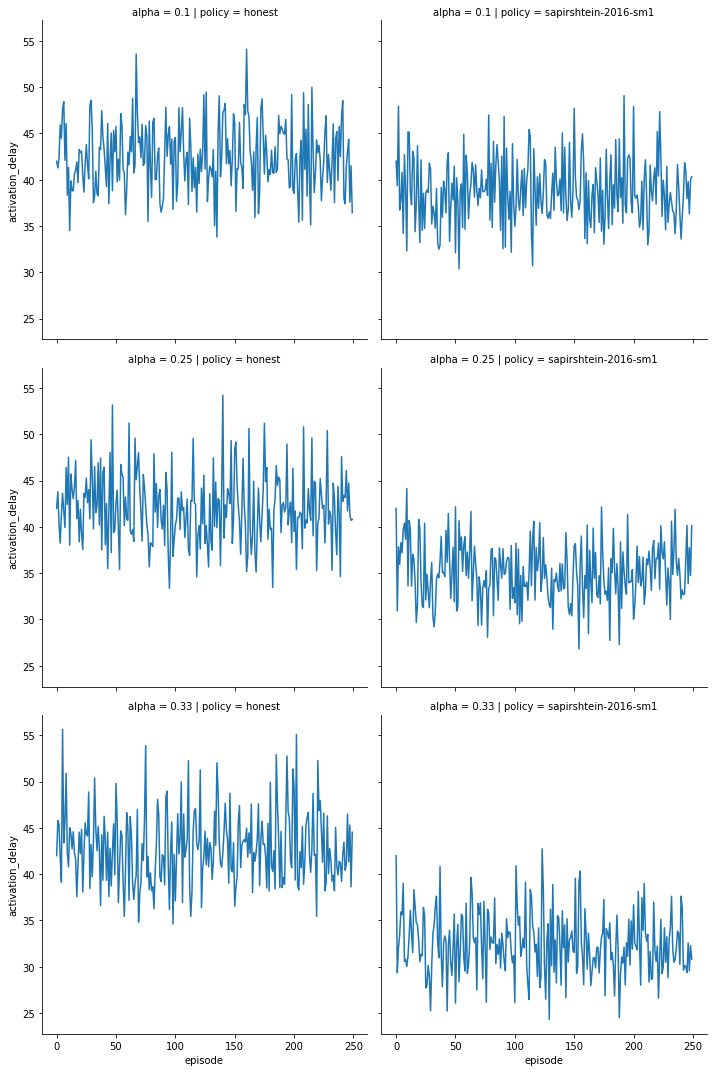

In [5]:
sns.relplot(
    data=d, kind="line", x="episode", y="activation_delay", col="policy", row="alpha"
)

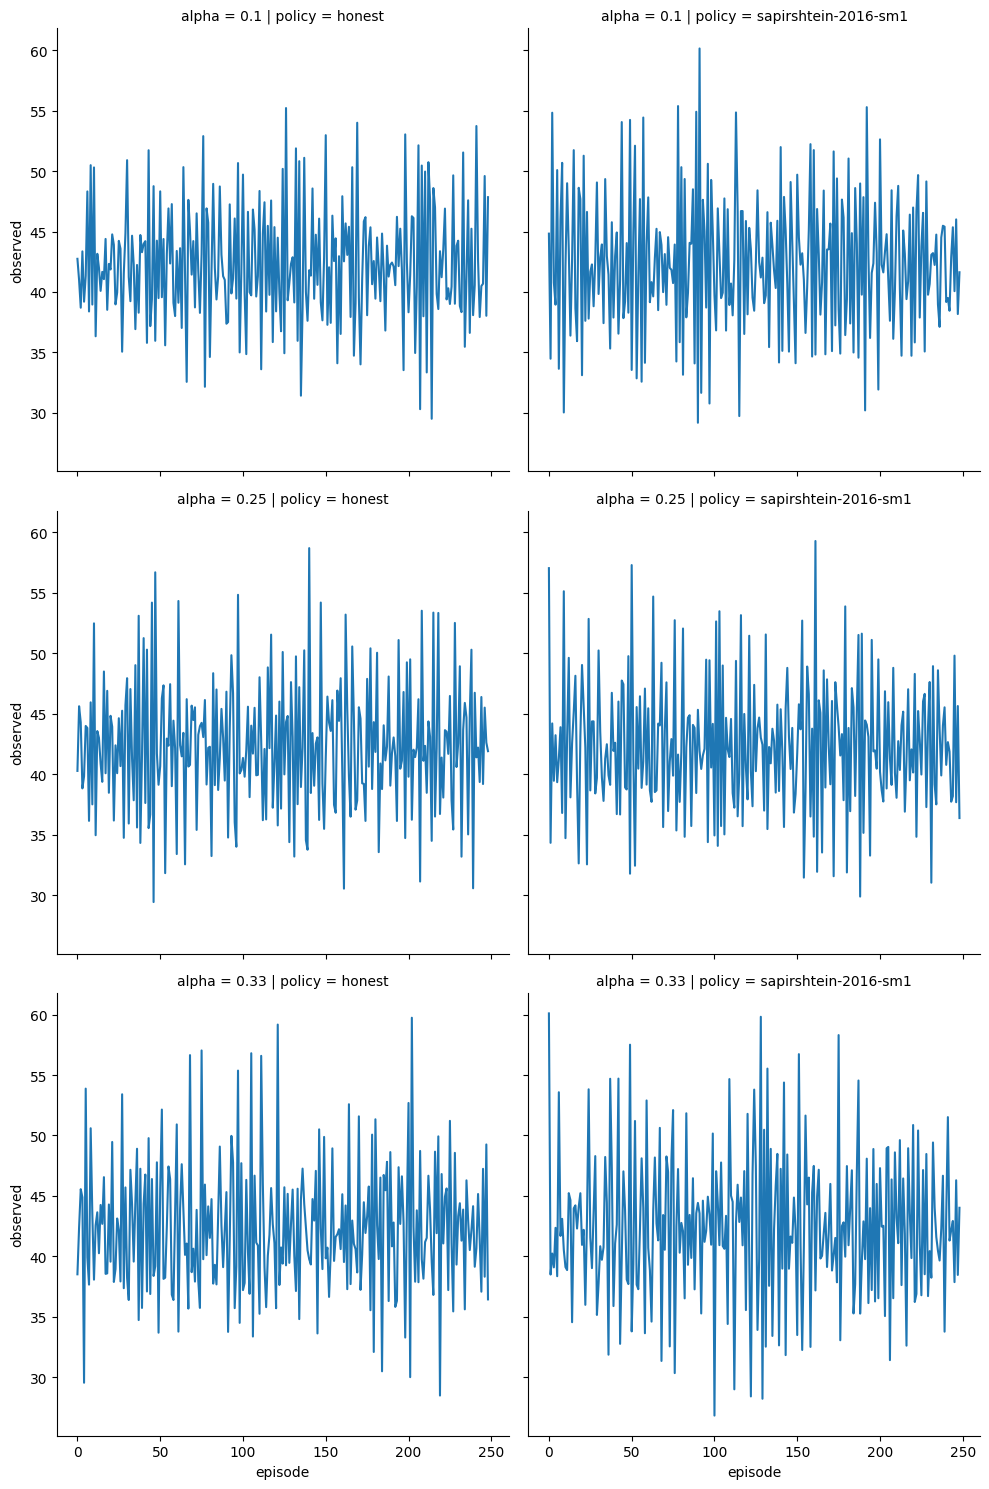

In [6]:
sns.relplot(
    data=d,
    kind="line",
    x="episode",
    y="observed",
    col="policy",
    row="alpha",
)